In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import math
from collections import Counter
import datetime


pd.set_option('display.max_columns', None,'display.max_row', None)
# pd.set_option('display.max_rows', 1000)

default_figsize = (15,5)

In [2]:
#df_funds_related = pd.read_csv('ROI.csv')
df_funds_sum = pd.read_csv('../bulk_export_processed/Funding_sum.csv')

In [3]:
df_funds_sum.head()
df = pd.read_csv('unifed_csv_20210124_2.csv')
df = df.set_index('company_uuid').join(df_funds_sum.set_index('org_uuid'))
#df.drop(columns=['investment_delta','norm_amount_delta','momentum','ROI','max_norm_amount_delta',\
#                 'mean_norm_amount_delta','roi_from_mean_momentum','Unnamed: 0', 'uuid'], inplace= True)
df.head()

/opt/anaconda3/envs/UBS/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (37,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,company_name,rank,country_code,city,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,Unnamed: 0,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid
company_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001a6ec-e7e9-4d1b-8a77-adb5ac815420,SOICO,724461.0,JPN,Tokyo,operating,NaN,NaN,2018-01-01,unknown,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00057beb-5724-c809-5cd2-a0a7c6b017aa,CyfraPay,405833.0,ESP,Madrid,operating,NaN,NaN,2011-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000ab460-8462-450d-ab34-b3c54fc252fd,Avantrio,491253.0,LKA,Colombo,operating,NaN,NaN,2018-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000ad7a8-b868-f301-5f00-2a3361288fc9,Eligible,8076.0,USA,Brooklyn,operating,2.0,25200000.0,2011-11-11,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127605.0,0.754386,0.245614,0.070175,0.017544,0.017544,0.017544,57.0,13.0,19.0,0.0,0.0,43.0,29753.0,7a703ded-1829-90af-2368-ac0f9f628c61
000b6081-b440-4875-9ea1-2ffa60efa210,dotWhite,889961.0,ROM,Cluj-napoca,operating,NaN,NaN,2014-10-17,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.iloc[5000:].head()

,company_name,rank,country_code,city,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,Unnamed: 0,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid
company_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25df88ee-8abd-1c70-1ab0-cf27e35d399c,Lore,12878.0,USA,New York,acquired,5.0,13123837.0,2010-01-01,11-50,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, -1.9292730844793713, 1.9856516540454365,...","[0.0, -7.655845573330819, 3.9602147069115183, ...",0.063881,-0.724203,0.0,1018000.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-15,NaN,NaN,NaN,12612.0,0.833333,0.166667,0.666667,0.166667,0.666667,0.000,6.0,14857.0,20713.0,1018000.0,0.0,4.0,25921.0,71815815-4124-9073-c205-58fb839b1b41
25e0011c-dcdb-4e48-b581-ff0f17c61f2f,Onetechway,319210.0,GBR,Kendal,operating,NaN,NaN,2017-01-01,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6564.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25e16464-02fd-459e-96eb-9d2019b445bf,Spectrum Accounting and Auditing,698881.0,ARE,Al Satwa,operating,NaN,NaN,2015-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25e44b76-9244-4687-91fd-75d092fdf189,Chalice,46404.0,USA,San Diego,operating,1.0,4600000.0,2017-01-01,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11775.0,0.875000,0.125000,0.875000,0.250000,0.125000,0.125,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25e4734a-a177-4b64-8af6-986f6cee4af8,Financial Machineries,657689.0,GBR,London,operating,NaN,NaN,2014-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6564.0,0.000000,1.000000,1.000000,0.000000,0.333333,0.000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns=['rank', 'Unnamed: 0'],inplace= True)
#df = df.join(df_funds_related.set_index('org_uuid'))
#df.insert(0,'company_uuid',value = df.index)
#df.insert(5,'top_100_invested',value = df['num_invested_by_top_100'])
#df = df.drop(columns=['num_invested_by_top_100'])
df = df.reset_index(drop = True)
df.head()

,company_name,country_code,city,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid
0,SOICO,JPN,Tokyo,operating,NaN,NaN,2018-01-01,unknown,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,CyfraPay,ESP,Madrid,operating,NaN,NaN,2011-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Avantrio,LKA,Colombo,operating,NaN,NaN,2018-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Eligible,USA,Brooklyn,operating,2.0,25200000.0,2011-11-11,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127605.0,0.754386,0.245614,0.070175,0.017544,0.017544,0.017544,57.0,19.0,0.0,0.0,43.0,29753.0,7a703ded-1829-90af-2368-ac0f9f628c61
4,dotWhite,ROM,Cluj-napoca,operating,NaN,NaN,2014-10-17,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['has_parent'] = 1*~df['parent_org_parent_uuid'].isnull()

In [7]:
# One-hot encoder
def onehot_encoder(df: pd.DataFrame, col_name: str, num_selected: int) -> pd.DataFrame:
    '''
    Performs one-hot encoding on a dataframe's column for its values with most occurrences

    :param pd.DataFrame df: dataframe to be processed
    :param str col_name: name of the encoded column
    :param int num_selected: number of values with most occurrences
    :return: processed dataframe
    :rtype: pd.DataFrame
    '''
    series = df[col_name].value_counts()
    selected_col_name = series.head(num_selected).index.tolist()

    for item in selected_col_name:
        df[col_name + "_" + item] = np.where(df[col_name] == item, 1, 0) # whenever df[col_name] == cat replace it with 1 else 0
        
    df.drop(columns=col_name, inplace=True)
    return df

In [8]:
# #Fillna for acquisition prices, selective mean value method
# df['acquisitions_acquirer_name'] = df['acquisitions_acquirer_name'].fillna("")
# mean = df['acquisitions_price_usd'].mean()
# #Selecting 0 or mean to be filled
# def fillwhat(df): 
#     if df['acquisitions_acquirer_name']=="" :
#         return 0
#     else :
#         return mean

# fill_df = df.copy()
# fill_df = fill_df[['acquisitions_price_usd','acquisitions_acquirer_name']].apply(fillwhat, axis=1)
# fill_df = pd.DataFrame(fill_df)
# df['acquisitions_price_usd'] = fill_df

# #drop the name column which has no use any more
# df = df.drop(columns=['acquisitions_acquirer_name'])

In [9]:
"""
#Fillna for total funds, selective mean value method
df['num_funding_rounds'] = df['num_funding_rounds'].fillna("0")
mean = df['total_funding_usd'].mean()
#Selecting 0 or mean to be filled
def fillwhat(df): 
    if df['num_funding_rounds']==0 :
        return 0
    else :
        return mean

fill_df = df.copy()
fill_df = fill_df[['total_funding_usd','num_funding_rounds']].apply(fillwhat, axis=1)
fill_df = pd.DataFrame(fill_df)
df['total_funding_usd'] = fill_df
"""

'\n#Fillna for total funds, selective mean value method\ndf[\'num_funding_rounds\'] = df[\'num_funding_rounds\'].fillna("0")\nmean = df[\'total_funding_usd\'].mean()\n#Selecting 0 or mean to be filled\ndef fillwhat(df): \n    if df[\'num_funding_rounds\']==0 :\n        return 0\n    else :\n        return mean\n\nfill_df = df.copy()\nfill_df = fill_df[[\'total_funding_usd\',\'num_funding_rounds\']].apply(fillwhat, axis=1)\nfill_df = pd.DataFrame(fill_df)\ndf[\'total_funding_usd\'] = fill_df\n'

In [10]:
"""
#Fillna for counts, fill with 0 method
col_nan_to_zero = [ 'fund_rd_investor_count','any_top_partner', 'num_exits', 'event_count']
for col in range(13,30):
    df.iloc[:,col] = df.iloc[:,col].fillna(0)

df.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)
df.iloc[:,64:] = df.iloc[:,64:].fillna(0)
"""

"\n#Fillna for counts, fill with 0 method\ncol_nan_to_zero = [ 'fund_rd_investor_count','any_top_partner', 'num_exits', 'event_count']\nfor col in range(13,30):\n    df.iloc[:,col] = df.iloc[:,col].fillna(0)\n\ndf.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)\ndf.iloc[:,64:] = df.iloc[:,64:].fillna(0)\n"

In [11]:
#df_funds_related.head()

In [12]:
#types_series = df['status'].value_counts()
#print(types_series)

In [13]:
#types_series = df['primary_role'].value_counts()
#print(types_series)

In [14]:
# df['primary_role'] = df['primary_role'].fillna("")
# company = []
# investor = []
# school = []

# #If match append 1 otherwise append 0. Equivalent for one-hot encoding
# for i in df['primary_role']:
#     if "company" in i:
#         company.append(1)
#     else:
#         company.append(0)
#     if "investor" in i:
#         investor.append(1)
#     else:
#         investor.append(0)
#     if "school" in i:
#         school.append(1)
#     else:
#         school.append(0)

# df.insert(15,'primary_role_company',value = company)
# df.insert(16,'primary_role_school',value = school)
# df.insert(17,'primary_role_investor', value = investor)
            
# #Drop the encoded column
# df=df.drop(['primary_role'],axis=1)

In [15]:
df.head()

,company_name,country_code,city,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid,has_parent
0,SOICO,JPN,Tokyo,operating,NaN,NaN,2018-01-01,unknown,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,CyfraPay,ESP,Madrid,operating,NaN,NaN,2011-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Avantrio,LKA,Colombo,operating,NaN,NaN,2018-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Eligible,USA,Brooklyn,operating,2.0,25200000.0,2011-11-11,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127605.0,0.754386,0.245614,0.070175,0.017544,0.017544,0.017544,57.0,19.0,0.0,0.0,43.0,29753.0,7a703ded-1829-90af-2368-ac0f9f628c61,0
4,dotWhite,ROM,Cluj-napoca,operating,NaN,NaN,2014-10-17,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
# #make sure to do <pip install pycountry-convert> and <pip install geopy>
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_alpha3_to_country_alpha2
#import pycountry_convert
from geopy.geocoders import Nominatim

def get_continent(col):
    try:
        cn_a2_code =  country_alpha3_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

#def geolocate(country):
#    try:
#        # Geolocate the center of the country
#        loc = geolocator.geocode(country_alpha3_to_country_name(country))
#      # And return latitude and longitude
#        return (loc.latitude, loc.longitude)
#    except:
#        # Return missing value
#        return np.nan

df['continent'] = df['country_code'].apply(get_continent)
#df['location'] = df['country_code'].apply(geolocate)
#df['continent']
#df.iloc[:,16:].info()

In [17]:
df['continent'] = df['continent'].apply(lambda x: np.nan if x=='Unknown' else x)
df['continent'].value_counts()

df = onehot_encoder(df, 'continent', 6)

df.head()
#df['country_code'].value_counts().head(10)
#df['city'].value_counts().head(10)

,company_name,country_code,city,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC
0,SOICO,JPN,Tokyo,operating,NaN,NaN,2018-01-01,unknown,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
1,CyfraPay,ESP,Madrid,operating,NaN,NaN,2011-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
2,Avantrio,LKA,Colombo,operating,NaN,NaN,2018-01-01,1-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
3,Eligible,USA,Brooklyn,operating,2.0,25200000.0,2011-11-11,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127605.0,0.754386,0.245614,0.070175,0.017544,0.017544,0.017544,57.0,19.0,0.0,0.0,43.0,29753.0,7a703ded-1829-90af-2368-ac0f9f628c61,0,1,0,0,0,0,0
4,dotWhite,ROM,Cluj-napoca,operating,NaN,NaN,2014-10-17,11-50,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [18]:
# 'World Cities Database' by Simplemaps.com is licensed under CC BY 4.0.
worldcities_df = pd.read_csv('worldcities.csv')
keep_col = ['city', 'lat', 'lng']
worldcities_df = worldcities_df[keep_col]

In [19]:
# city_count_df is used to visualize the world map only
city_count_df = df[['uuid', 'city']]

In [20]:
# join df to link up city, count and location (lat, lng)
city_count_df = city_count_df.set_index('city').join(worldcities_df.set_index('city'))
city_count_df.reset_index(inplace=True)
# dropna as they cannot be plotted
city_count_df.dropna(subset=['lat', 'lng'], inplace=True)

The cell below is commented because it takes lots of time to run. It is STILL part of the final code.

In [21]:
# # installation
# # pip install folium

# # Create a world map to show distributions of organizations
# import folium
# from folium.plugins import MarkerCluster

# # empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# # for each coordinate, create circlemarker of city
# for i in range(len(city_count_df)):
#         lat = city_count_df.iloc[i]['lat']
#         lng = city_count_df.iloc[i]['lng']
#         radius = 5
#         popup_text = """City : {}<br>
#                     Count : {}<br>"""
#         popup_text = popup_text.format(city_count_df.iloc[i]['city'],
#                                    city_count_df.iloc[i]['company_uuid']
#                                    )
#         folium.CircleMarker(location=[lat, lng], radius=radius, popup=popup_text, fill=True).add_to(marker_cluster)
# sw = city_count_df[['lat','lng']].min().values.tolist()
# ne = city_count_df[['lat','lng']].max().values.tolist()

# world_map.fit_bounds([sw, ne])
# # show the map
# # world_map

# # export the map as .html file
# world_map.save('world_map_fintech_companies.html')

In [22]:
# numbers obtained by inspection on value_counts()
num_country_keep = 20
num_city_keep = 20
df = onehot_encoder(df, 'country_code', num_country_keep)
df = onehot_encoder(df, 'city', num_city_keep)

In [23]:
df['status'] = df['status'].fillna("")
operating = []
exited = []
closed = []

#If match append 1 otherwise append 0. Equivalent for one-hot encoding
for i in df['status']:
    if "operating" in i:
        operating.append(1)
    else:
        operating.append(0)
    if "acquired" in i or "ipo" in i:
        exited.append(1)
    else:
        exited.append(0) 
    if "closed" in i:
        closed.append(1)  
    else:
        closed.append(0)  
        
df['status_operating'] = pd.DataFrame(operating)
df['status_exited'] = pd.DataFrame(exited)
df['status_closed'] = pd.DataFrame(closed)
# df.insert(4,'operating',value = operating)
# df.insert(5,'closed',value = closed)
# df.insert(6,'success',value = success)
# df.insert(7,'success_acquired', value = acquired)
# df.insert(8,'success_ipo',value = ipo)   
        
# #Drop the encoded column
# df=df.drop(['status'],axis=1)

In [24]:
#acquisitions_acquired_on   >>change to integer values
# find the duration of the job
df = df.reset_index(drop=True)
num_data = len(df)
today = ["2021-01-28"] * num_data
df['today'] = pd.DataFrame(today)
df['acq_acquired_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['acq_acquired_on'], errors='coerce', format='%d/%m/%Y')
df['acq_acquired_on'] = pd.to_numeric(df['acq_acquired_on'].dt.days, downcast='integer')
df['acq_acquired_on'] = df['acq_acquired_on'].fillna(0)
df['acq_acquired_on'] = df['acq_acquired_on'].apply(lambda x: round(int(x)/365,4))
df['acq_acquired_on'] = df['acq_acquired_on'].apply(lambda x: x if x != 0 else None)

# take mean for NaN
#mean = df['acquisitions_acquired_on'].mean()
#df['acquisitions_acquired_on'].fillna(value=mean, inplace=True)
# convert TimeDelta to int
#df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].apply(lambda x: x.days)
# By Stardust: how to handle NaN? Too many of them
# By Boris 0116: Not handle NaN then, do the same as ipo
df['has_acquisitions'] = 1*~df['acq_acquired_on'].isnull()

#ipo_share_price_usd    >>change to yes/no ipos
df['ipo_went_public_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['ipo_went_public_on'], errors='coerce', format='%d/%m/%Y')
df['ipo_went_public_on'] = pd.to_numeric(df['ipo_went_public_on'].dt.days, downcast='integer')
df['ipo_went_public_on'] = df['ipo_went_public_on'].fillna(0)
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: round(int(x)/365,4))
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: x if x != 0 else None)

df['has_ipo'] = 1*~df['ipo_share_price_usd'].isnull()

In [25]:
# Encode dates for founded_on (into year counted from now as 01-28-2021)
df['founded_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['founded_on'], errors='coerce', format='%Y/%m/%d')
df['founded_on'] = pd.to_numeric(df['founded_on'].dt.days, downcast='integer')
mean = df['founded_on'].mean()
df['founded_on'] = df['founded_on'].fillna(mean)
df['founded_on'] = df['founded_on'].apply(lambda x: round(int(x)/365,4))

# Encode dates for job duration (into year)
df['job_duration'] = df['job_duration'].fillna(0)
df['job_duration'] = df['job_duration'].apply(lambda x: round(int(x)/365,4))
df['job_duration'] = df['job_duration'].apply(lambda x: x if x != 0 else None)
df = df.drop(columns = ['today'])

In [26]:
# # Join the ROI dataframe
# roi_df = pd.read_csv('ROI.csv')
# df = df.set_index('company_uuid').join(roi_df.set_index('org_uuid'))

In [27]:
# df.insert(0,'company_uuid', df.index)
# df.reset_index(inplace = True, drop = True)
# df.head()

In [28]:
df.drop_duplicates(subset='uuid', inplace=True)

In [29]:
df.dropna(subset=['fd_rd_norm_amount_delta'], inplace = True)
df.drop(columns = ['ipo_went_public_on','ipo_share_price_usd','ipo_valuation_price_usd','ipo_money_raised_usd','acq_acquired_on','acq_price_usd'], inplace = True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 8 to 32923
Columns: 104 entries, company_name to has_ipo
dtypes: float64(44), int64(52), object(8)
memory usage: 2.6+ MB


,company_name,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,funds_uuid,funds_raised_amount_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,uuid,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,status_operating,status_exited,status_closed,has_acquisitions,has_ipo
8,All of Us,operating,3.0,4025000.0,4.0767,1-10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1.4782608695652173],[2.964228733838415],1.478261,2.964229,NaN,3500000.0,NaN,NaN,NaN,NaN,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,44.0,3500000.0,0.0,0.0,313558.0,63fa63c6-a528-4c86-bf2c-1d49aba1767e,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,PayPlug,acquired,5.0,13316538.0,8.7507,11-50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.5797531446386408, 0.5068237304070482, -0.10...","[0.33166655871775785, 1.0164936430145377, -0.0...",0.557546,0.934681,0.0,1832166.0,NaN,NaN,NaN,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,71.0,1832166.0,0.0,2.0,31374.0,55003c8d-441c-80bb-2d71-e26d212a9441,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33,Zeitgold,operating,5.0,57011648.0,6.0795,101-250,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.9033189988247787, -0.04465762850307098, 0.8...","[1.8015935357494595, -0.02979956526295941, 0.7...",0.579845,0.825104,2.0,0.0,NaN,NaN,NaN,NaN,52.3534,1.000000,0.000000,0.727273,0.545455,0.000000,0.000000,11.0,142.0,0.0,0.0,2.0,160320.0,54c9fba5-a3ea-73bb-cf6c-ffcd396e74a3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
43,AID:Tech,operating,10.0,3180350.0,4.7068,11-50,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.5154464131306302],[0.22859961554489538],0.515446,0.228600,1.0,1180350.0,NaN,NaN,NaN,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,158.0,1180350.0,0.0,10.0,210498.0,c2bd02ac-b368-4324-a9ff-e603f8f909a7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
47,OwlTing,operating,4.0,5700000.0,10.4164,101-250,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0

In [30]:
# sns.jointplot(x='xxx, y='yyy', data=, color = 'k')
#type(df['momentum'][5])
#df['momentum']

In [31]:
#df.drop(columns = ['level 0','norm_amount_delta', 'momentum'], inplace = True)
df.drop(columns = ['index','uuid','level_0','funds_uuid','funds_raised_amount_usd','parent_org_parent_uuid'], inplace = True)
df = df.rename(columns={'raised_amount_usd':'first_fund_raised','post_money_valuation_usd':'first_fund_post_money',\
                  'investor_count':'first_fund_investor_count'})
df['average_change_in_funds'] = df['fd_rd_mean_norm_amount_delta']
df['average_momentum'] = df['fd_rd_mean_momentum']

df.drop(columns=['fd_rd_mean_momentum','fd_rd_mean_norm_amount_delta','fd_rd_first_fund_raised','fd_rd_norm_amount_delta'], inplace = True)
df.head()

,company_name,status,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_pca_0,cat_pca_1,cat_pca_2,cat_pca_3,cat_pca_4,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_momentum,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,status_operating,status_exited,status_closed,has_acquisitions,has_ipo,average_change_in_funds,average_momentum
8,All of Us,operating,3.0,4025000.0,4.0767,1-10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[2.964228733838415],NaN,NaN,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.478261,2.964229
16,PayPlug,acquired,5.0,13316538.0,8.7507,11-50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.33166655871775785, 1.0164936430145377, -0.0...",0.0,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.557546,0.934681
33,Zeitgold,operating,5.0,57011648.0,6.0795,101-250,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.8015935357494595, -0.02979956526295941, 0.7...",2.0,NaN,52.3534,1.000000,0.000000,0.727273,0.545455,0.000000,0.000000,11.0,0.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.579845,0.825104
43,AID:Tech,operating,10.0,3180350.0,4.7068,11-50,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.22859961554489538],1.0,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.515446,0.228600
47,OwlTing,operating,4.0,5700000.0,10.4164,101-250,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.29873932006930753, 0.38409685386267006]",0.0,NaN,59.6986,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.908425,0.341418


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 8 to 32923
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3305 non-null   object 
 1   status                                       3305 non-null   object 
 2   num_funding_rounds                           3305 non-null   float64
 3   total_funding_usd                            3305 non-null   float64
 4   founded_on                                   3305 non-null   float64
 5   employee_count                               3305 non-null   object 
 6   cat_pca_0                                    3305 non-null   float64
 7   cat_pca_1                                    3305 non-null   float64
 8   cat_pca_2                                    3305 non-null   float64
 9   cat_pca_3                                    3305 non-null   float64
 10 

In [33]:
#Fillna for counts, fill with 0 method
#col_nan_to_zero = [ 'fund_rd_investor_count','any_top_partner', 'num_exits', 'event_count']
for col in range(29,40):
    df.iloc[:,col] = df.iloc[:,col].fillna(0)

#df.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)
#df.iloc[:,64:] = df.iloc[:,64:].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 8 to 32923
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3305 non-null   object 
 1   status                                       3305 non-null   object 
 2   num_funding_rounds                           3305 non-null   float64
 3   total_funding_usd                            3305 non-null   float64
 4   founded_on                                   3305 non-null   float64
 5   employee_count                               3305 non-null   object 
 6   cat_pca_0                                    3305 non-null   float64
 7   cat_pca_1                                    3305 non-null   float64
 8   cat_pca_2                                    3305 non-null   float64
 9   cat_pca_3                                    3305 non-null   float64
 10 

In [34]:
#mean_momentum = []
#df['momentum'] = df['momentum'].fillna("na")
for moment in range(len(df['fd_rd_momentum'])):
    if df['fd_rd_momentum'].iloc[moment] != "na" and df['fd_rd_momentum'].iloc[moment] != 0:
        #if "inf" not in moment:
        list = df['fd_rd_momentum'].iloc[moment][1:-1].split(", ")
        total = []
        for each in list:
            total.append(float(each))
        df['fd_rd_momentum'].iloc[moment] = total
        #mean_momentum.append(total / len(moment))
            #mean_momentum.append(each for each in moment)
        #else:
        #    mean_momentum.append(np.inf)
    #else:
        #mean_momentum.append(np.nan)
        
df['latest_momentum'] = df['fd_rd_momentum'].apply(lambda x: 0 if x==0 else x[0])
#df['roi_from_mean_momentum'] = mean_momentum

#df['momentum'] = df['momentum'].apply(lambda x: 0 if x == 0 else x)


/opt/anaconda3/envs/UBS/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [35]:
#Fillna for counts, fill with 0 method
#col_nan_to_zero = [ 'fund_rd_investor_count','any_top_partner', 'num_exits', 'event_count']
#for col in range(32,43):
#    df.iloc[:,col] = df.iloc[:,col].fillna(0)
#
#df.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)
#df.iloc[:,64:] = df.iloc[:,64:].fillna(0)

In [36]:
df.drop(columns=['fd_rd_momentum'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 8 to 32923
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3305 non-null   object 
 1   status                                       3305 non-null   object 
 2   num_funding_rounds                           3305 non-null   float64
 3   total_funding_usd                            3305 non-null   float64
 4   founded_on                                   3305 non-null   float64
 5   employee_count                               3305 non-null   object 
 6   cat_pca_0                                    3305 non-null   float64
 7   cat_pca_1                                    3305 non-null   float64
 8   cat_pca_2                                    3305 non-null   float64
 9   cat_pca_3                                    3305 non-null   float64
 10 

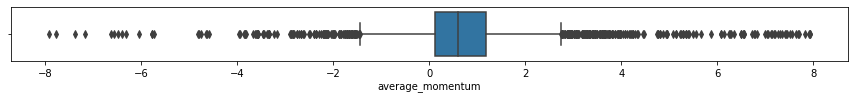

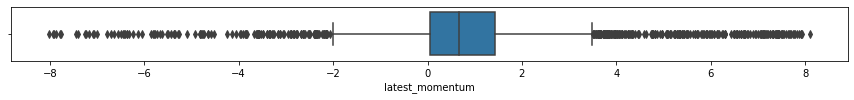

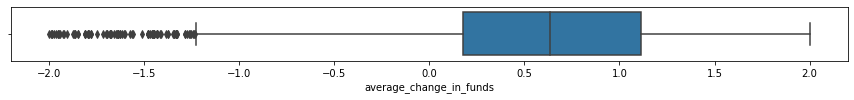

In [37]:
df.dropna(subset=['average_momentum', 'latest_momentum', 'average_change_in_funds'], inplace=True)


numerical_features = ['average_momentum', 'latest_momentum', 'average_change_in_funds']
    
for feature in numerical_features:
    fig, ax = plt.subplots(figsize=(15,1))
    sns.boxplot(data=df, x=feature)
    plt.show()

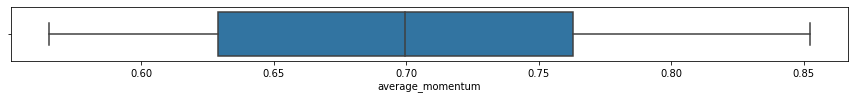

In [38]:
num_z_score = 0.1
roi_no_extreme = df[np.abs(df['average_momentum']-df['average_momentum'].mean()) <= (num_z_score*df['average_momentum'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_no_extreme, x='average_momentum')
plt.show()

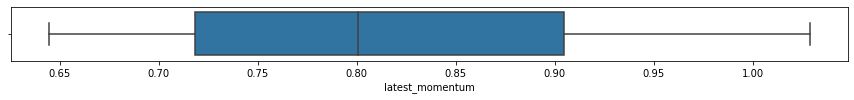

In [39]:
num_z_score = 0.1
roi_mean_no_extreme = df[np.abs(df['latest_momentum']-df['latest_momentum'].mean()) <= (num_z_score*df['latest_momentum'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_mean_no_extreme, x="latest_momentum")
plt.show()

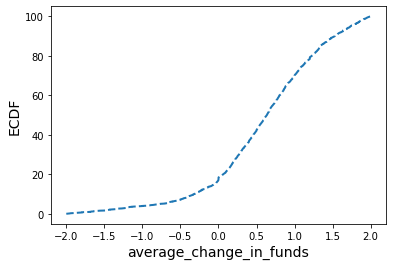

In [40]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(df['average_change_in_funds'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('average_change_in_funds', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [41]:
print(np.percentile(df['average_change_in_funds'].dropna(how='any'), [68, 95, 99.7]))

[0.96439081 1.73885534 1.98571167]


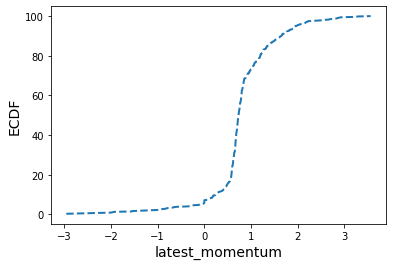

In [42]:
# Generate x and y values for ECDF: x, y
# x, y = dcst.ecdf(df['roi'])
x, y = dcst.ecdf(roi_no_extreme['latest_momentum'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('latest_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

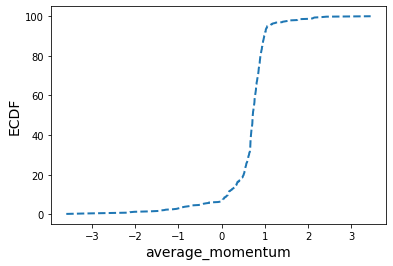

In [43]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(roi_mean_no_extreme['average_momentum'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('average_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [44]:
print(np.percentile(df['average_momentum'].dropna(how='any'), [68, 95, 99.7]))

[0.93860996 3.09591702 7.4294665 ]


In [45]:
#df = df.drop(columns=['roi', 'roi_mean_momentum'])
#drop it when we are 100% sure no need to use country/region/city anymore
#df.drop(columns=['country_code','region','city'])

In [46]:
df = df[(df['latest_momentum'] != 0) | (df['average_change_in_funds'] != 0) | (df['average_momentum'] != 0)\
       |(df['has_acquisitions'] != 0) | (df['has_ipo'] != 0)]

#new_df = df[(df['latest_momentum'] != 0) | (df['average_change_in_funds'] != 0) | (df['average_momentum'] != 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 8 to 32923
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3274 non-null   object 
 1   status                                       3274 non-null   object 
 2   num_funding_rounds                           3274 non-null   float64
 3   total_funding_usd                            3274 non-null   float64
 4   founded_on                                   3274 non-null   float64
 5   employee_count                               3274 non-null   object 
 6   cat_pca_0                                    3274 non-null   float64
 7   cat_pca_1                                    3274 non-null   float64
 8   cat_pca_2                                    3274 non-null   float64
 9   cat_pca_3                                    3274 non-null   float64
 10 

In [47]:
df.to_csv("unifed_csv.csv", index=False)